In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fichier_erp = pd.read_excel('Fichier_erp.xlsx')
fichier_web = pd.read_excel('Fichier_web.xlsx')
fichier_liaison = pd.read_excel('fichier_liaison.xlsx')

C:\Users\ZCWZ3296\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\ZCWZ3296\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\ZCWZ3296\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
#Vérifier si le fichier erp contient des valeurs manquantes
fichier_erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [4]:
#Vérifier si le fichier web contient des valeurs manquantes
fichier_web.isnull().sum()

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

In [5]:
#Afficher seulement les colonnes avec des valeurs manquantes
fichier_web_na = fichier_web.isnull().sum()
fichier_web_na[fichier_web_na>0]


sku                        85
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

In [6]:
#Retirer les valeurs manquantes du dataframe
fichier_web = fichier_web.loc[~fichier_web['sku'].isna()]
fichier_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
5,13895,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-19 10:41:50,...,chateau-saransot-dupre-bordeaux-blanc-2016,2020-04-25 21:11:40,2020-04-25 19:11:40,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [7]:
#Regarde si le dataframe fichier erp contient des doublons
fichier_erp.loc[fichier_erp['product_id'].duplicated(keep=False),:]

,product_id,onsale_web,price,stock_quantity,stock_status


In [8]:
#Regarde si le dataframe fichier web contient des doublons
fichier_web.loc[fichier_web['sku'].duplicated(keep=False),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
5,13895,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-19 10:41:50,...,chateau-saransot-dupre-bordeaux-blanc-2016,2020-04-25 21:11:40,2020-04-25 19:11:40,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,12881,0,0,0,0.0,2.0,NaN,NaN,2.0,2019-03-28 15:25:14,...,montbourgeau-etoile-vin-jaune-2009,2019-12-30 10:30:01,2019-12-30 09:30:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15663,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-27 10:27:01,...,chermette-domaine-du-vissoux-brouilly-pierreux...,2020-08-01 09:35:02,2020-08-01 07:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1510,15910,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-28 10:59:43,...,thevenet-quintaine-vire-clesse-la-bongran-2015,2020-08-14 10:45:02,2020-08-14 08:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1511,38,0,0,0,0.0,38.0,NaN,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [9]:
#Enlever les doublons
fichier_web = fichier_web[fichier_web['post_type'] == 'product']
fichier_web.shape

(714, 28)

In [10]:
fichier_erp.describe()

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.384000,26.583030
std,902.644635,0.337506,26.832271,45.875948
min,3847.000000,0.000000,-8.000000,-1.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


In [11]:
#Afficher les prix négatifs
fichier_erp[fichier_erp['price']<=0]

,product_id,onsale_web,price,stock_quantity,stock_status
469,5017,0,-8.0,0,outofstock
739,6594,0,-1.0,192,instock


In [12]:
#Retirer les prix négatifs du dataframe
fichier_erp = fichier_erp.loc[~(fichier_erp['price']<0)]
fichier_erp.shape

(823, 5)

In [13]:
fichier_erp.describe()

,product_id,onsale_web,price,stock_quantity
count,823.000000,823.000000,823.000000,823.000000
mean,5161.035237,0.871203,32.473633,26.414338
std,902.346337,0.335179,26.802511,45.558173
min,3847.000000,0.000000,5.200000,-1.000000
25%,4342.500000,1.000000,14.650000,1.000000
50%,4904.000000,1.000000,24.400000,11.000000
75%,5804.500000,1.000000,42.050000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


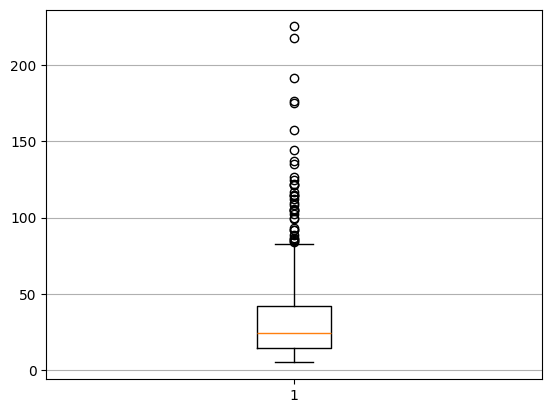

In [14]:
#Schematiser le panel de prix
plt.boxplot(fichier_erp.price)
plt.grid(axis='y')

In [15]:
#Calcule écart interquartile
fichier_erp['price'].quantile(0.75) - fichier_erp['price'].quantile(0.25)

27.4

In [16]:
#Calcul du seuil inferieur
seuil_inferieur = round(fichier_erp['price'].quantile(0.25)-1.5*(fichier_erp['price'].quantile(0.75) - fichier_erp['price'].quantile(0.25)))
print('Le seuil inférieur est de', seuil_inferieur)

Le seuil inférieur est de -26


In [17]:
#Calcul du seuil supérieur
borne_superieur = round(fichier_erp['price'].quantile(0.75)+1.5*(fichier_erp['price'].quantile(0.75) - fichier_erp['price'].quantile(0.25)))
print('Le seuil supérieur est de', borne_superieur)

Le seuil supérieur est de 83


In [18]:
#Affichage des boutilles ayant un prix plus élevé que la borne supérieur
bouteille_sup_borne_superieur = fichier_erp[fichier_erp['price']>borne_superieur]
len(bouteille_sup_borne_superieur)

37

In [19]:
#afficher la liste des bouteilles
bouteille_sup_borne_superieur

,product_id,onsale_web,price,stock_quantity,stock_status
19,4055,0,86.1,1,outofstock
66,4115,1,100.0,11,instock
68,4132,1,88.4,5,instock
208,4352,1,225.0,0,outofstock
210,4355,1,126.5,2,instock
214,4359,1,85.6,0,outofstock
227,4402,1,176.0,8,instock
228,4404,1,108.5,2,instock
230,4406,1,157.0,3,instock
231,4407,1,104.0,6,instock


In [20]:
#Affichage des anomalies de stock
fichier_erp[(fichier_erp['stock_status'] == 'instock') & (fichier_erp['stock_quantity']<1)]

,product_id,onsale_web,price,stock_quantity,stock_status
443,4954,1,25.0,0,instock


In [21]:
#Affichage des anomalies de stock
fichier_erp[(fichier_erp['stock_status']== 'outofstock') & (fichier_erp['stock_quantity']>0)]

,product_id,onsale_web,price,stock_quantity,stock_status
19,4055,0,86.1,1,outofstock
49,4090,0,73.0,6,outofstock
50,4092,0,47.0,6,outofstock
630,5826,1,41.2,12,outofstock
696,6125,0,14.2,48,outofstock


In [22]:
#Affichage des anomalies de quantité
fichier_erp[fichier_erp['stock_quantity']==-1]

,product_id,onsale_web,price,stock_quantity,stock_status
449,4973,0,10.0,-1,outofstock
573,5700,1,44.5,-1,outofstock


In [23]:
#Jointure entre le datafreme fichier_erp et fichier_web
erp_liaison = pd.merge(fichier_erp, fichier_liaison, on='product_id', how='inner')
liaison_erp_web = pd.merge(erp_liaison, fichier_web, left_on='id_web', right_on='sku')
liaison_erp_web = liaison_erp_web.drop('id_web', axis=1)
liaison_erp_web.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,1,24.2,0,outofstock,15298,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,1,34.3,0,outofstock,15296,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,1,20.8,0,outofstock,15300,0,0,0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,1,14.1,0,outofstock,19814,0,0,0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,1,46.0,0,outofstock,19815,0,0,0,0.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [24]:
# Fonction qui teste une cle primaire

def Test_PK(df, colonnes):
    
    if df.size == df.drop_duplicates(colonnes).size :
        print("C est une clé primaire.".format(colonnes))
    else :
        print("C est pas une clé primaire.".format(colonnes))
    
    # On renvoie également le comptage
    print("Le dataframe est de la forme : " + str(df.shape) + " (lignes, colonnes)")

In [25]:
Test_PK(liaison_erp_web, 'product_id')

C est une clé primaire.
Le dataframe est de la forme : (714, 33) (lignes, colonnes)


In [26]:
#Calcule du chiffre d'affaire par produit
liaison_erp_web['ca_par_produit'] = liaison_erp_web['price'] * liaison_erp_web['total_sales']
liaison_erp_web.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,ca_par_produit
0,3847,1,24.2,0,outofstock,15298,0,0,0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,145.2
1,3849,1,34.3,0,outofstock,15296,0,0,0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
2,3850,1,20.8,0,outofstock,15300,0,0,0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
3,4032,1,14.1,0,outofstock,19814,0,0,0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,42.3
4,4039,1,46.0,0,outofstock,19815,0,0,0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0


Text(0.5, 0, 'Produits')

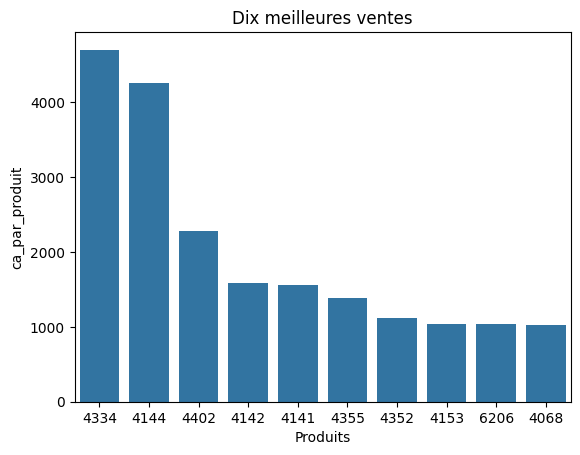

In [27]:
#Les dix meilleures ventes
meilleures_ventes = liaison_erp_web.sort_values('ca_par_produit', ascending=False).head(10)
ordre_produits = meilleures_ventes['product_id']
sns.barplot(data=meilleures_ventes, x='product_id', y='ca_par_produit', order=ordre_produits)
plt.title("Dix meilleures ventes")
plt.xlabel("Produits")

In [28]:
#Calcule du chiffre d'affaire total
ca_total = liaison_erp_web['ca_par_produit'].sum()
print('Le chiffre d affaire de Bottleneck est de', ca_total)

Le chiffre d affaire de Bottleneck est de 70568.6
